In [39]:
!pip install pandas-datareader

In [40]:
!pip install yfinance

In [51]:
from pandas_datareader import data as pdr #import pandas datareader

import yfinance as yf # you will need to install it if haven't done it already

#override the data reader function

yf.pdr_override()

data = pdr.get_data_yahoo("MSFT", start="2013-12-01", end="2023-07-31")

[*********************100%***********************]  1 of 1 completed


In [52]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-02,38.090000,38.779999,38.060001,38.450001,32.511471,42950400
2013-12-03,38.139999,38.490002,38.080002,38.310001,32.393101,52109800
2013-12-04,38.209999,38.980000,38.119999,38.939999,32.925793,51983600
2013-12-05,38.849998,38.880001,37.180000,38.000000,32.130993,116305000
2013-12-06,38.419998,38.549999,37.990002,38.360001,32.435375,36457300


In [53]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-24,345.850006,346.920013,342.309998,345.109985,345.109985,26678100
2023-07-25,347.109985,351.890015,345.070007,350.980011,350.980011,41637700
2023-07-26,341.440002,344.670013,333.109985,337.769989,337.769989,58383700
2023-07-27,340.480011,341.329987,329.049988,330.720001,330.720001,39635300
2023-07-28,333.670013,340.010010,333.170013,338.369995,338.369995,28484900


<AxesSubplot:xlabel='Date'>

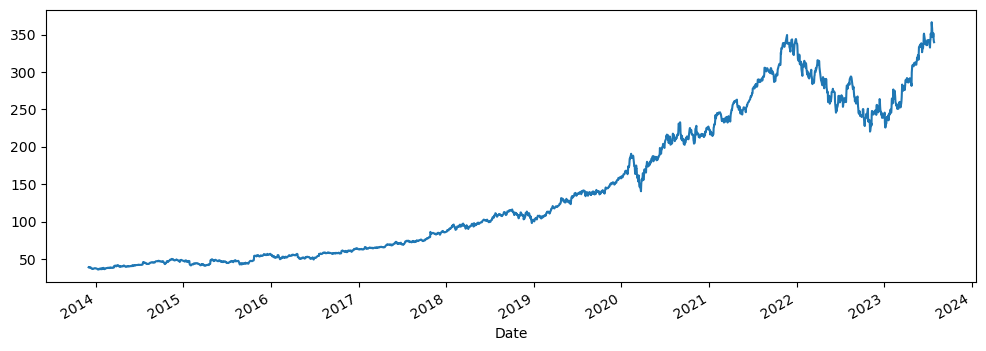

In [54]:
data['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

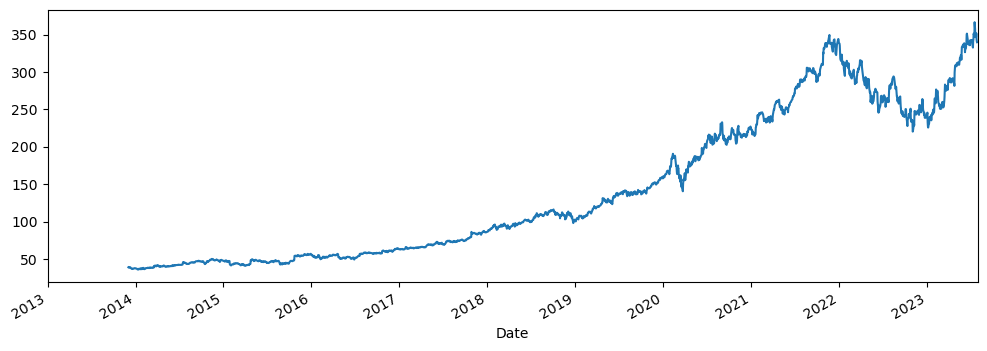

In [59]:
## xlimit and y limit
data['High'].plot(xlim=['2013-01-01','2023-07-31'],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

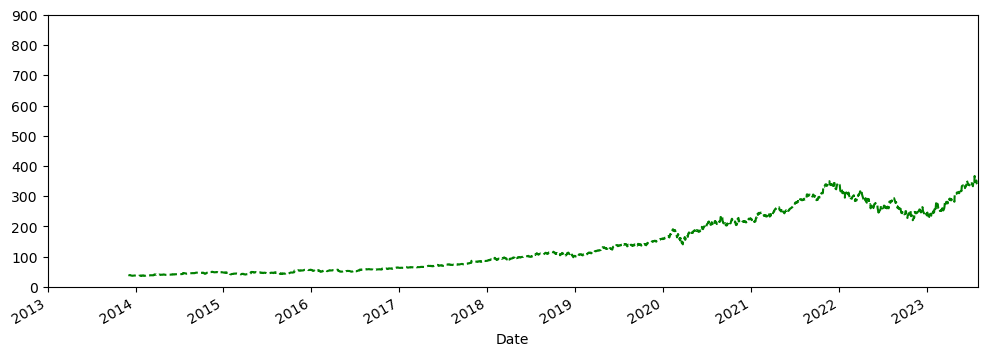

In [60]:
## xlimit and y limit and coloring
data['High'].plot(xlim=['2013-01-01','2023-07-31'],ylim=[0,900],figsize=(12,4),ls='--',c='green')

In [61]:
data.index

DatetimeIndex(['2013-12-02', '2013-12-03', '2013-12-04', '2013-12-05',
               '2013-12-06', '2013-12-09', '2013-12-10', '2013-12-11',
               '2013-12-12', '2013-12-13',
               ...
               '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20',
               '2023-07-21', '2023-07-24', '2023-07-25', '2023-07-26',
               '2023-07-27', '2023-07-28'],
              dtype='datetime64[ns]', name='Date', length=2430, freq=None)

In [62]:
index=data.loc['2013-01-01':'2023-07-31'].index
share_open=data.loc['2013-01-01':'2023-07-31']['Open']

In [63]:
share_open

Date
2013-12-02     38.090000
2013-12-03     38.139999
2013-12-04     38.209999
2013-12-05     38.849998
2013-12-06     38.419998
                 ...    
2023-07-24    345.850006
2023-07-25    347.109985
2023-07-26    341.440002
2023-07-27    340.480011
2023-07-28    333.670013
Name: Open, Length: 2430, dtype: float64

In [64]:
index

DatetimeIndex(['2013-12-02', '2013-12-03', '2013-12-04', '2013-12-05',
               '2013-12-06', '2013-12-09', '2013-12-10', '2013-12-11',
               '2013-12-12', '2013-12-13',
               ...
               '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20',
               '2023-07-21', '2023-07-24', '2023-07-25', '2023-07-26',
               '2023-07-27', '2023-07-28'],
              dtype='datetime64[ns]', name='Date', length=2430, freq=None)

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

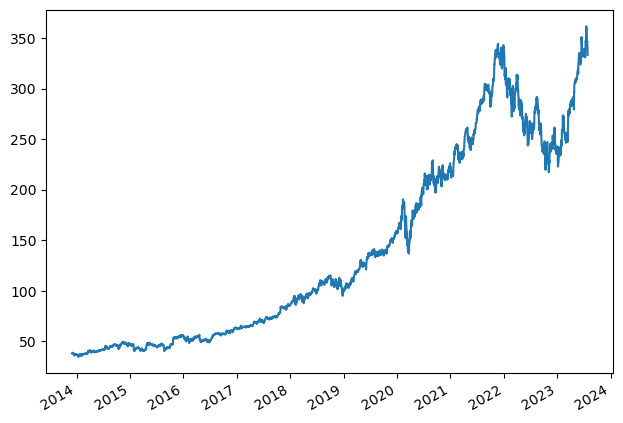

In [66]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [67]:
## Datetime Index

In [68]:
data=data.reset_index()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2430 non-null   datetime64[ns]
 1   Open       2430 non-null   float64       
 2   High       2430 non-null   float64       
 3   Low        2430 non-null   float64       
 4   Close      2430 non-null   float64       
 5   Adj Close  2430 non-null   float64       
 6   Volume     2430 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 133.0 KB


In [70]:
data=data.set_index('Date',drop=True)

In [71]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-02,38.090000,38.779999,38.060001,38.450001,32.511471,42950400
2013-12-03,38.139999,38.490002,38.080002,38.310001,32.393101,52109800
2013-12-04,38.209999,38.980000,38.119999,38.939999,32.925793,51983600
2013-12-05,38.849998,38.880001,37.180000,38.000000,32.130993,116305000
2013-12-06,38.419998,38.549999,37.990002,38.360001,32.435375,36457300


In [72]:
## datetime
from datetime import datetime

# Time Resampling

In [73]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-02,38.090000,38.779999,38.060001,38.450001,32.511471,42950400
2013-12-03,38.139999,38.490002,38.080002,38.310001,32.393101,52109800
2013-12-04,38.209999,38.980000,38.119999,38.939999,32.925793,51983600
2013-12-05,38.849998,38.880001,37.180000,38.000000,32.130993,116305000
2013-12-06,38.419998,38.549999,37.990002,38.360001,32.435375,36457300


In [74]:
data.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,36.200001,36.549999,35.529999,36.250000,30.651264,14243000
2014-12-31,34.730000,35.880001,34.630001,34.980000,29.577415,11437800
2015-12-31,40.340000,40.740002,39.720001,40.290001,35.095688,9009100
2016-12-31,48.680000,49.150002,48.040001,48.430000,43.831482,8409600
2017-12-31,62.189999,62.660000,61.950001,62.299999,57.119202,7425600
2018-12-31,86.059998,86.309998,83.830002,85.010002,79.680984,13677200
2019-12-31,99.550003,100.190002,97.199997,97.400002,92.874725,8989200
2020-12-31,137.009995,140.570007,132.520004,135.419998,131.395462,10550600
2021-12-31,212.169998,214.509995,211.940002,212.250000,207.556931,13900200


In [75]:
data.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,38.849998,38.980000,38.369999,38.939999,32.925793,116305000
2014-12-31,49.740002,50.049999,49.389999,49.610001,42.826359,202522400
2015-12-31,56.470001,56.849998,56.290001,56.549999,50.462662,169164000
2016-12-31,63.840000,64.099998,63.410000,63.619999,58.329437,133503000
2017-12-31,87.120003,87.500000,86.230003,86.849998,81.405632,71066700
2018-12-31,115.419998,116.180000,114.930000,115.610001,109.764458,111242100
2019-12-31,159.449997,159.550003,158.220001,158.960007,153.815750,55636400
2020-12-31,229.270004,232.860001,227.350006,231.649994,225.936462,97012700
2021-12-31,344.619995,349.670013,342.200012,343.109985,338.335938,69870600


<AxesSubplot:xlabel='Date'>

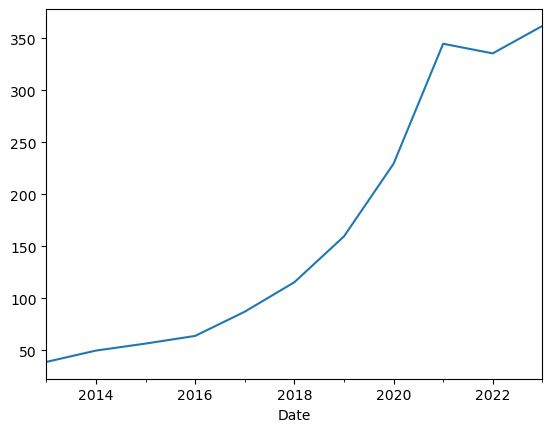

In [76]:
data.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

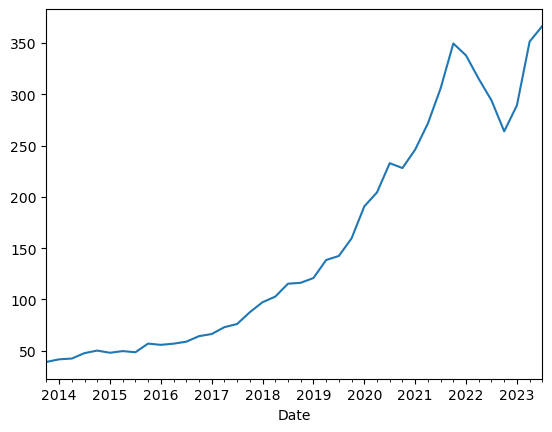

In [77]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
data.resample(rule='QS').max()['High'].plot()

In [78]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
data.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,38.849998,38.980000,38.369999,38.939999,32.925793,116305000
2014-12-31,49.740002,50.049999,49.389999,49.610001,42.826359,202522400
2015-12-31,56.470001,56.849998,56.290001,56.549999,50.462662,169164000
2016-12-30,63.840000,64.099998,63.410000,63.619999,58.329437,133503000
2017-12-29,87.120003,87.500000,86.230003,86.849998,81.405632,71066700
2018-12-31,115.419998,116.180000,114.930000,115.610001,109.764458,111242100
2019-12-31,159.449997,159.550003,158.220001,158.960007,153.815750,55636400
2020-12-31,229.270004,232.860001,227.350006,231.649994,225.936462,97012700
2021-12-31,344.619995,349.670013,342.200012,343.109985,338.335938,69870600


In [79]:
data.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,38.849998,38.980000,38.369999,38.939999,32.925793,116305000
2014-01-01,40.720001,41.500000,40.400002,40.990002,34.919067,93162300
2014-04-01,42.169998,42.290001,41.700001,42.250000,36.246384,74640000
2014-07-01,47.299999,47.570000,46.980000,47.520000,41.022160,202522400
2014-10-01,49.740002,50.049999,49.389999,49.610001,42.826359,64551200
2015-01-01,47.610001,47.910000,46.900002,47.590000,41.341686,169164000
2015-04-01,48.869999,49.540001,48.599998,49.160000,43.009476,130933700
2015-07-01,47.980000,48.410000,47.540001,47.580002,41.899197,88753700
2015-10-01,56.470001,56.849998,56.290001,56.549999,50.462662,135227100


<AxesSubplot:xlabel='Date'>

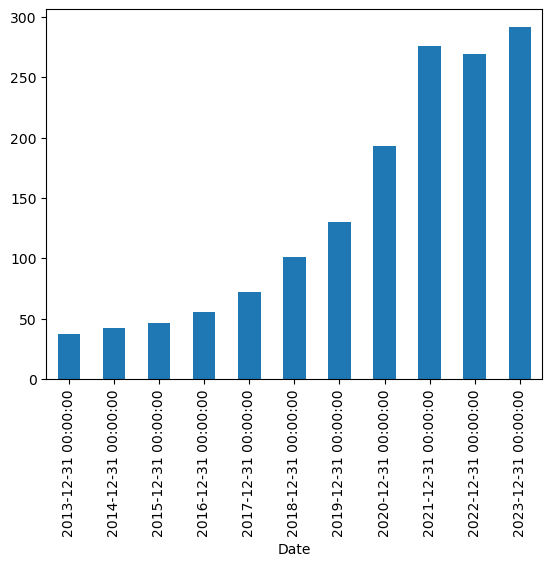

In [80]:
##plotting
data['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

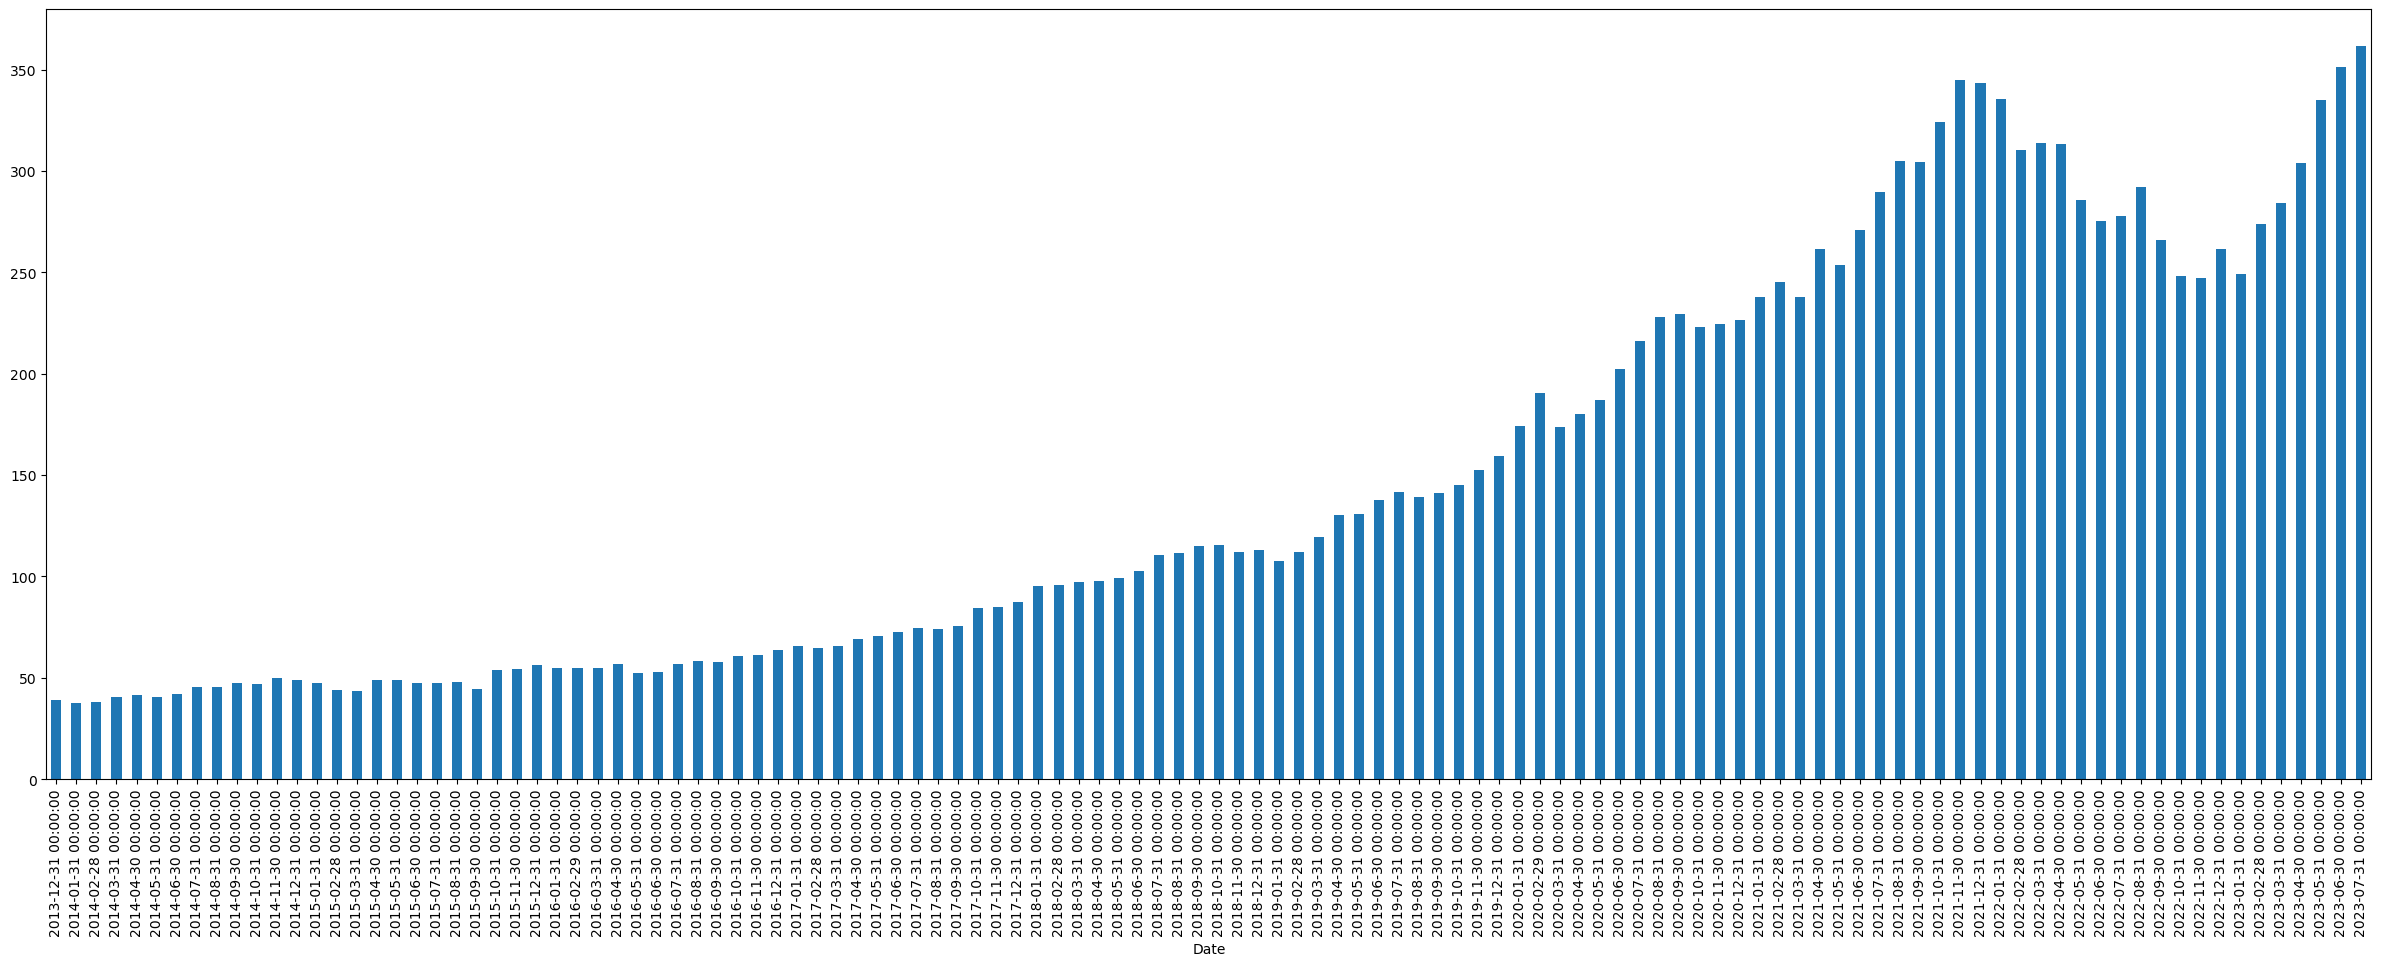

In [84]:
data['Open'].resample(rule='M').max().plot(kind='bar',figsize=(30,10))

In [85]:
data['High'].rolling(11).max().head(20)

Date
2013-12-02          NaN
2013-12-03          NaN
2013-12-04          NaN
2013-12-05          NaN
2013-12-06          NaN
2013-12-09          NaN
2013-12-10          NaN
2013-12-11          NaN
2013-12-12          NaN
2013-12-13          NaN
2013-12-16    38.980000
2013-12-17    38.980000
2013-12-18    38.980000
2013-12-19    38.900002
2013-12-20    38.900002
2013-12-23    38.900002
2013-12-24    38.900002
2013-12-26    38.299999
2013-12-27    37.639999
2013-12-30    37.619999
Name: High, dtype: float64

In [86]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-02,38.090000,38.779999,38.060001,38.450001,32.511471,42950400
2013-12-03,38.139999,38.490002,38.080002,38.310001,32.393101,52109800
2013-12-04,38.209999,38.980000,38.119999,38.939999,32.925793,51983600
2013-12-05,38.849998,38.880001,37.180000,38.000000,32.130993,116305000
2013-12-06,38.419998,38.549999,37.990002,38.360001,32.435375,36457300


In [87]:
data['Open:30 days rolling']=data['Open'].rolling(30).mean()

In [88]:
data.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2013-12-02,38.090000,38.779999,38.060001,38.450001,32.511471,42950400,NaN
2013-12-03,38.139999,38.490002,38.080002,38.310001,32.393101,52109800,NaN
2013-12-04,38.209999,38.980000,38.119999,38.939999,32.925793,51983600,NaN
2013-12-05,38.849998,38.880001,37.180000,38.000000,32.130993,116305000,NaN
2013-12-06,38.419998,38.549999,37.990002,38.360001,32.435375,36457300,NaN
2013-12-09,38.560001,38.869999,38.369999,38.709999,32.731323,30286000,NaN
2013-12-10,38.610001,38.900002,38.020000,38.110001,32.223972,37828600,NaN
2013-12-11,38.060001,38.299999,37.389999,37.610001,31.801207,39853400,NaN
2013-12-12,37.639999,37.639999,37.180000,37.220001,31.471453,36012800,NaN


<AxesSubplot:xlabel='Date'>

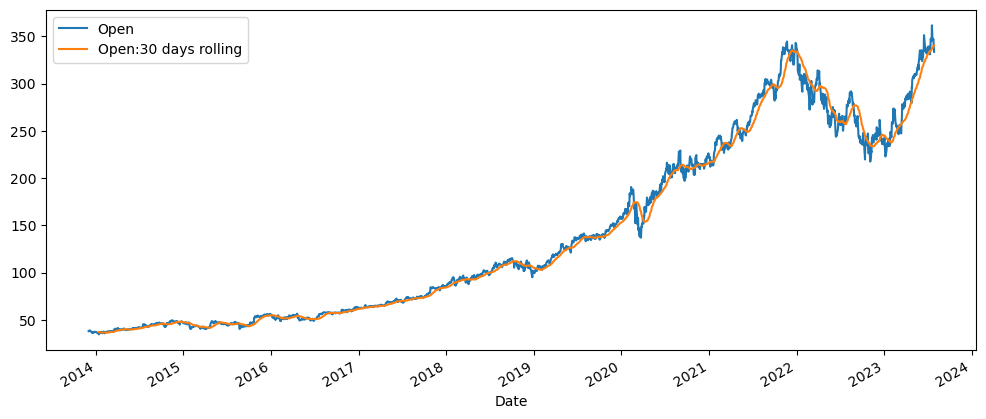

In [89]:
data[['Open','Open:30 days rolling']].plot(figsize=(12,5))